In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [45]:
df1 = pd.read_csv('api_data_aadhar_enrolment_0_500000.csv')
df2 = pd.read_csv('api_data_aadhar_enrolment_500000_1000000.csv')
df3 = pd.read_csv('api_data_aadhar_enrolment_1000000_1006029.csv')
df1.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [46]:
df2.head() 

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,26-10-2025,Andhra Pradesh,Nalgonda,508004,0,1,0
1,26-10-2025,Andhra Pradesh,Nalgonda,508238,1,0,0
2,26-10-2025,Andhra Pradesh,Nalgonda,508278,1,0,0
3,26-10-2025,Andhra Pradesh,Nandyal,518432,0,1,0
4,26-10-2025,Andhra Pradesh,Nandyal,518543,1,0,0


In [47]:
# Combine df1, df2, and df3 into one master dataframe
df_final = pd.concat([df1, df2, df3], ignore_index=True)

# Verify the result
print(f"Total rows: {len(df_final)}")
df_final.head()

Total rows: 1006029


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [48]:
df_final.isnull().sum()

date              0
state             0
district          0
pincode           0
age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

In [49]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 non-null  object
 3   pincode         1006029 non-null  int64 
 4   age_0_5         1006029 non-null  int64 
 5   age_5_17        1006029 non-null  int64 
 6   age_18_greater  1006029 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 53.7+ MB


In [50]:
df_final.columns

Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')

In [51]:
df_final['date'] = pd.to_datetime(df_final['date'], format='%d-%m-%Y')

In [52]:
df_final.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21


In [53]:
df_copy = df_final.copy()

In [54]:
df_copy['total_enrol'] = df_copy['age_0_5'] + df_copy['age_5_17'] + df_copy['age_18_greater']
df_copy.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrol
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,109
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,86
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,123
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,106
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,51


In [55]:
#percentage of total enrolment by age group
df_copy['perc_age_0_5'] = df_copy['age_0_5'] / df_copy['total_enrol'] * 100
df_copy['perc_age_5_17'] = df_copy['age_5_17']/df_copy['total_enrol']*100
df_copy['perc_age_18_greater'] = df_copy['age_18_greater']/df_copy['total_enrol']*100

In [56]:
df_copy.head(10)

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,total_enrol,perc_age_0_5,perc_age_5_17,perc_age_18_greater
0,2025-03-02,Meghalaya,East Khasi Hills,793121,11,61,37,109,10.091743,55.963303,33.944954
1,2025-03-09,Karnataka,Bengaluru Urban,560043,14,33,39,86,16.279070,38.372093,45.348837
2,2025-03-09,Uttar Pradesh,Kanpur Nagar,208001,29,82,12,123,23.577236,66.666667,9.756098
3,2025-03-09,Uttar Pradesh,Aligarh,202133,62,29,15,106,58.490566,27.358491,14.150943
4,2025-03-09,Karnataka,Bengaluru Urban,560016,14,16,21,51,27.450980,31.372549,41.176471
5,2025-03-09,Bihar,Sitamarhi,843331,20,49,12,81,24.691358,60.493827,14.814815
6,2025-03-09,Bihar,Sitamarhi,843330,23,24,42,89,25.842697,26.966292,47.191011
7,2025-03-09,Uttar Pradesh,Bahraich,271865,26,60,14,100,26.000000,60.000000,14.000000
8,2025-03-09,Uttar Pradesh,Firozabad,283204,28,26,10,64,43.750000,40.625000,15.625000
9,2025-03-09,Bihar,Purbi Champaran,845418,30,48,10,88,34.090909,54.545455,11.363636


In [57]:
len(df_copy)

1006029

In [58]:
state_age_breakdown = (
    df_copy.groupby('state')[['age_0_5', 'age_5_17', 'age_18_greater']]
    .sum(numeric_only=True)
    .sort_values(ascending=False, by='age_18_greater')
)
state_age_breakdown.head(15)

,age_0_5,age_5_17,age_18_greater
state,,,
Meghalaya,21179,53305,35287
Assam,141235,66085,22877
Uttar Pradesh,521045,479682,17902
Gujarat,193031,71182,16336
Bihar,262875,334802,11908
Karnataka,179262,33863,10110
Madhya Pradesh,367990,116381,9599
West Bengal,275391,91396,8510
Maharashtra,278814,82116,8209


In [59]:
cols_to_sum = ['age_0_5', 'age_5_17', 'age_18_greater', 'total_enrol']
state_summary = (
    df_copy.groupby('state')[cols_to_sum]
    .sum(numeric_only=True)
    .sort_values(ascending=False, by='total_enrol')
)
state_summary.head(10)

,age_0_5,age_5_17,age_18_greater,total_enrol
state,,,,
Uttar Pradesh,521045,479682,17902,1018629
Bihar,262875,334802,11908,609585
Madhya Pradesh,367990,116381,9599,493970
West Bengal,275391,91396,8510,375297
Maharashtra,278814,82116,8209,369139
Rajasthan,229780,113123,5555,348458
Gujarat,193031,71182,16336,280549
Assam,141235,66085,22877,230197
Karnataka,179262,33863,10110,223235


In [60]:
district_low_0_5 = (
    df_copy.groupby(['state','district'])['age_0_5']
    .sum(numeric_only=True)
    .sort_values(ascending=False)
)
district_low_0_5.head(15)

state           district         
West Bengal     Murshidabad          31442
Maharashtra     Thane                29092
West Bengal     South 24 Parganas    25039
Maharashtra     Pune                 24088
West Bengal     North 24 Parganas    21517
Rajasthan       Jaipur               21436
Bihar           Sitamarhi            20679
Karnataka       Bengaluru            20441
Telangana       Hyderabad            19721
Gujarat         Surat                18412
West Bengal     Uttar Dinajpur       18397
Uttar Pradesh   Bareilly             17187
Madhya Pradesh  Indore               16685
Uttar Pradesh   Agra                 16314
Maharashtra     Nashik               16262
Name: age_0_5, dtype: int64

In [61]:
district_low_5_17 = (
    df_copy.groupby(['state','district'])['age_5_17']
    .sum(numeric_only=True)
    .sort_values(ascending=False)
)
district_low_5_17.head(20)

state          district        
Uttar Pradesh  Bahraich            22360
Bihar          Gaya                20244
               Sitamarhi           18856
               East Champaran      18371
               West Champaran      18070
               Patna               17151
               Saran               16407
Meghalaya      East Khasi Hills    14606
Bihar          Muzaffarpur         14103
Uttar Pradesh  Sitapur             13869
Maharashtra    Thane               13629
Uttar Pradesh  Azamgarh            13577
               Varanasi            13404
               Kheri               12841
               Agra                12691
               Kanpur Nagar        12606
Bihar          Madhubani           12534
               Nawada              12380
Uttar Pradesh  Hardoi              12290
               Gorakhpur           12090
Name: age_5_17, dtype: int64

In [62]:
date_enrol = (
    df_copy.groupby('date')['total_enrol']
    .sum(numeric_only=True)
)
date_enrol.head(20)

date
2025-03-02       109
2025-03-09      3404
2025-03-15      3102
2025-03-20      6218
2025-03-23       576
2025-03-26       211
2025-03-27      2704
2025-03-28       191
2025-03-29        67
2025-04-01    257438
2025-05-01    183616
2025-06-01    215734
2025-07-01    616868
2025-09-01     74989
2025-09-02     76496
2025-09-03     71988
2025-09-04     65349
2025-09-05     26069
2025-09-06     58957
2025-09-07     14658
Name: total_enrol, dtype: int64

In [64]:
df_copy['month'] = df_final['date'].dt.to_period('M')
monthly_trend = (
    df_copy.groupby('month')['total_enrol']
    .sum(numeric_only=True)
)
monthly_trend.head(25)

month
2025-03      16582
2025-04     257438
2025-05     183616
2025-06     215734
2025-07     616868
2025-09    1475879
2025-10     817920
2025-11    1092007
2025-12     759658
Freq: M, Name: total_enrol, dtype: int64

In [65]:
pincode_summary = (
    df_copy.groupby(['state','district','pincode'])['total_enrol']
    .sum(numeric_only=True)
    .sort_values(ascending=False)
)
pincode_summary.head(20)

state           district             pincode
Uttar Pradesh   Moradabad            244001     15122
                Aligarh              202001     11833
Meghalaya       West Khasi Hills     793119     11321
Delhi           West Delhi           110059     10462
Uttar Pradesh   Saharanpur           247001     10189
                Rampur               244901      9572
                Meerut               250002      9378
                Agra                 282001      8686
Maharashtra     Aurangabad           431001      8645
Uttar Pradesh   Shahjahanpur         242001      8511
Madhya Pradesh  Barwani              451666      8459
Uttar Pradesh   Gautam Buddha Nagar  201301      8433
                Unnao                209801      8122
Haryana         Faridabad            121004      8107
Maharashtra     Thane                421302      7796
Delhi           North East Delhi     110094      7437
Uttar Pradesh   Bahraich             271855      7238
                Firozabad            

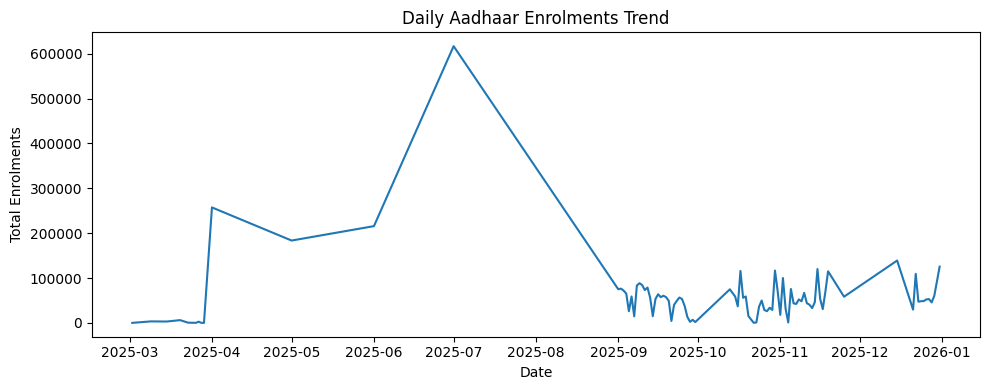

In [66]:
#Daily enrolment trend plot
daily = df_copy.groupby('date')['total_enrol'].sum(numeric_only=True)
plt.figure(figsize=(10,4))
plt.plot(daily.index,daily.values)
plt.title("Daily Aadhaar Enrolments Trend")
plt.xlabel("Date")
plt.ylabel("Total Enrolments")
plt.tight_layout()
plt.show()

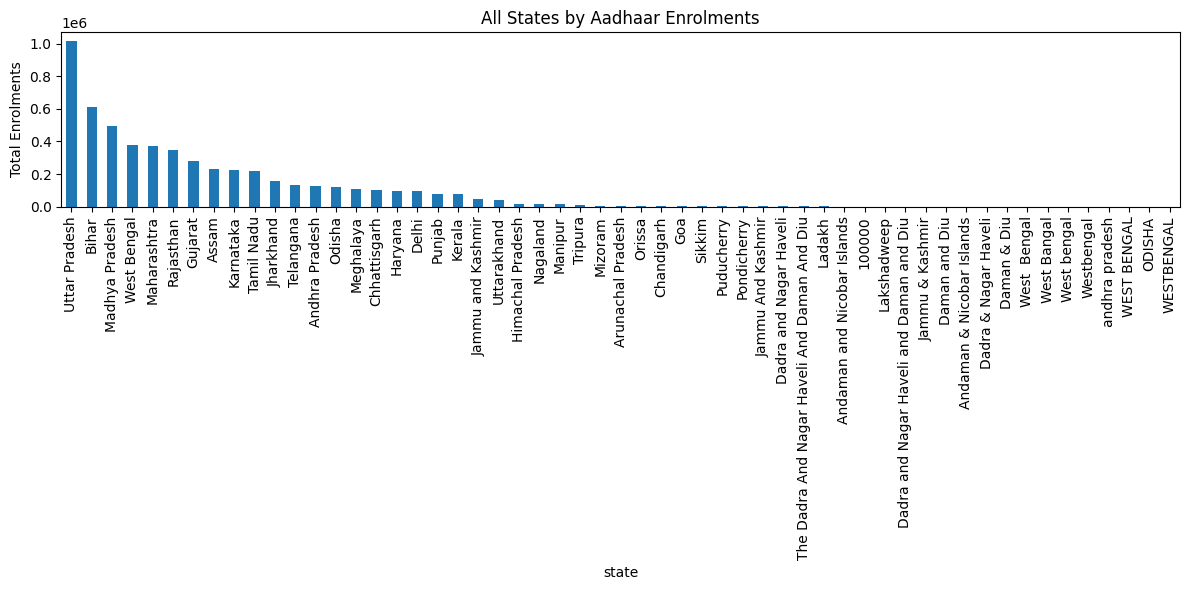

In [69]:
state_totals = (
    df_copy.groupby('state')['total_enrol']
    .sum()
    .sort_values(ascending=False)   
)

plt.figure(figsize=(12,6))
state_totals.plot(kind='bar')
plt.title("All States by Aadhaar Enrolments")
plt.ylabel("Total Enrolments")
plt.tight_layout()
plt.show()


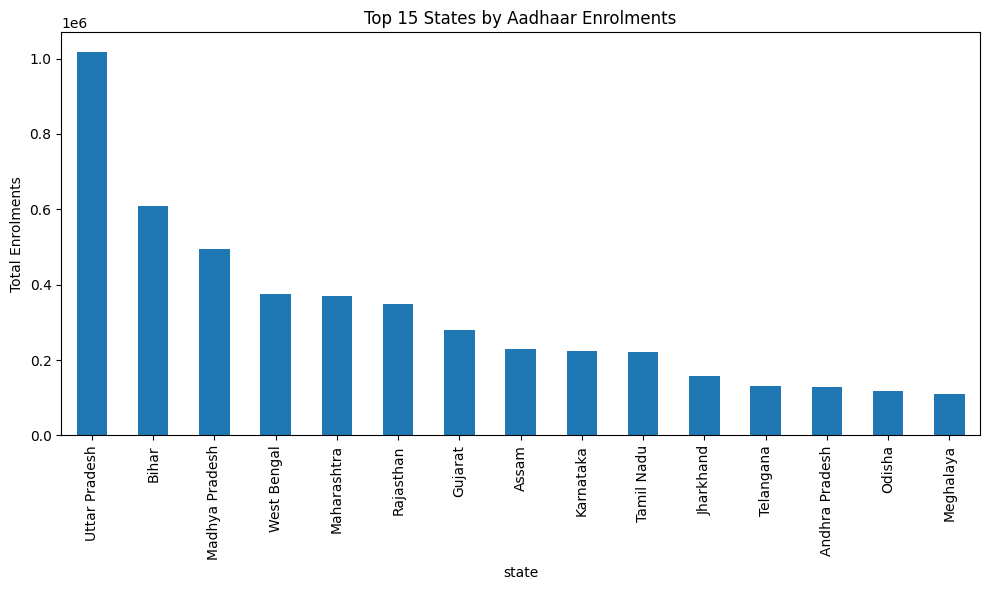

In [68]:
state_totals = (
    df_copy.groupby('state')['total_enrol']
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(10,6))
state_totals.plot(kind='bar')
plt.title("Top 15 States by Aadhaar Enrolments")
plt.ylabel("Total Enrolments")
plt.tight_layout()
plt.show()


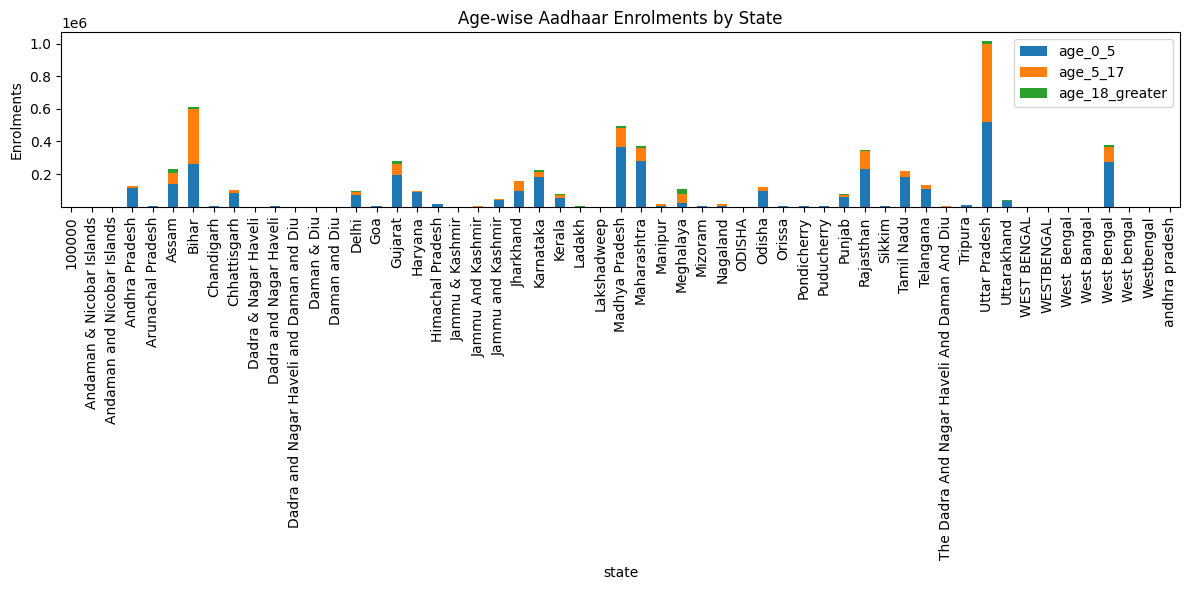

In [73]:
age_state = df_copy.groupby('state')[['age_0_5','age_5_17','age_18_greater']].sum()

age_state.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6)
)
plt.title("Age-wise Aadhaar Enrolments by State")
plt.ylabel("Enrolments")
plt.tight_layout()
plt.show()


The "Education vs. Migration" Divide
Observation: In states like Bihar and Uttar Pradesh, the "Child (5-17)" bar is often proportionally taller compared to other states.

Analysis: This indicates a high volume of Mandatory Biometric Updates (MBU) and first-time enrollments. Because these states have massive young populations, the system is under pressure from the "Student Life Cycle"—Aadhaar is required for school admissions and scholarships.

Insight: In these states, Aadhaar is primarily an educational enabler.

The "Saturation Gap" (Early vs. Late Bloomers)
Observation: Look at the total height of the bars. Some states have a balanced ratio, while others are skewed.

Analysis: If a state has a very low child enrollment count relative to its population size, it indicates an Infrastructure Gap in schools or rural areas.

Insight: This allows UIDAI to "Predict the Backlog." If children aren't enrolled now, there will be a massive, unmanageable surge in adult enrollments 5 years later when they need IDs for college.

C:\Users\Tulsi\AppData\Local\Temp\ipykernel_1392\3225802940.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x['age_5_17'].sum() / (x['age_0_5'].sum()+1))


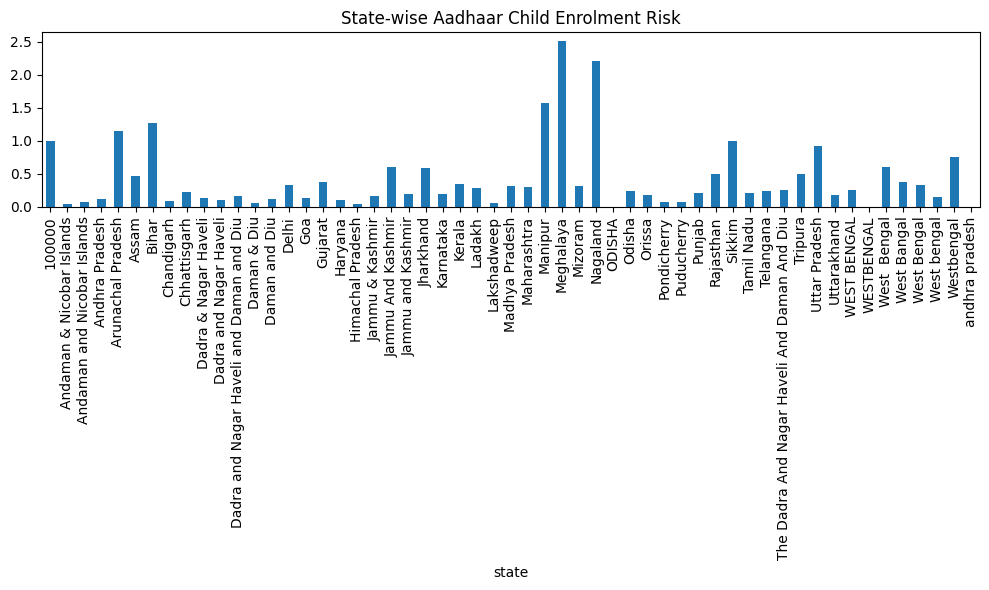

In [75]:
state_risk = (
    df_copy.groupby('state')
    .apply(lambda x: x['age_5_17'].sum() / (x['age_0_5'].sum()+1))
)

plt.figure(figsize=(10,6))
state_risk.plot(kind='bar')
plt.title("State-wise Aadhaar Child Enrolment Risk")
plt.tight_layout()
plt.show()


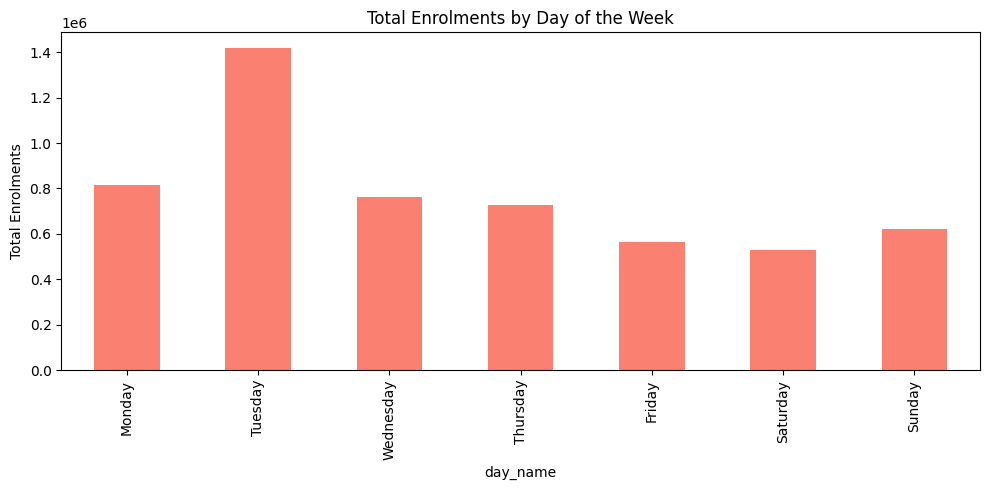

In [77]:
# Add Day of Week and Day Type
df_copy['day_name'] = df_copy['date'].dt.day_name()
df_copy['is_weekend'] = df_copy['date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Grouping by day name to see the distribution
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_summary = df_copy.groupby('day_name')['total_enrol'].sum().reindex(day_order)

# Plotting
plt.figure(figsize=(10, 5))
weekday_summary.plot(kind='bar', color='salmon')
plt.title('Total Enrolments by Day of the Week')
plt.ylabel('Total Enrolments')
plt.tight_layout()
plt.savefig('weekday_analysis.png')

Observation:
Aadhaar enrolments are heavily concentrated midweek peaking sharply on Tuesday followed by a steady decline toward Friday, which records one of the lowest weekday enrolment volumes.

Analysis:
This pattern reveals a structural imbalance in operational utilization. Enrolment centres experience overload midweek while operating significantly below capacity at the end of the week. The Tuesday surge indicates backlog clearance and maximum staff deployment, whereas the Friday drop-off reflects behavioral disengagement and operational fatigue, not a lack of citizen demand.

Rather than being demand-driven, enrolments are shaped by administrative rhythms—staff availability, internal workflows, and citizen perceptions of “best days” to complete formal tasks.

Insight:
UIDAI can predict and prevent service bottlenecks by treating Tuesday as a saturation-risk day and Friday as an efficiency-opportunity day. Without intervention, repeated midweek overload will increase queue times, biometric failures, and data quality risks. Conversely, reallocating appointments, staffing, and system-heavy tasks toward Fridays can increase total weekly throughput without expanding infrastructure, transforming idle capacity into operational resilience.

Dates with anomalously high enrolment:
date
2025-04-01    257438
2025-06-01    215734
2025-07-01    616868
Name: total_enrol, dtype: int64


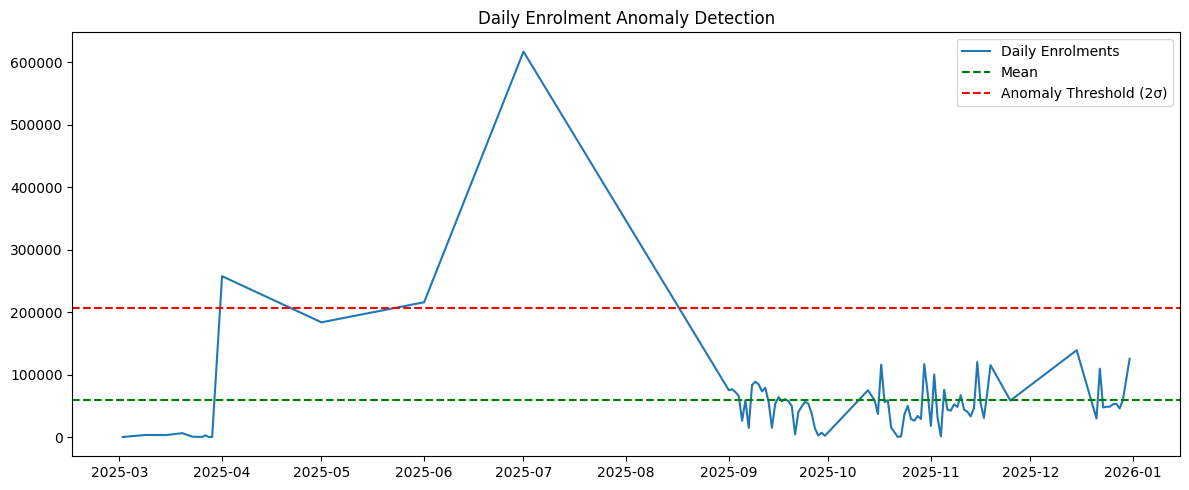

In [79]:
daily_enrol = df_copy.groupby('date')['total_enrol'].sum()
mean_val = daily_enrol.mean()
std_val = daily_enrol.std()
threshold = mean_val + 2 * std_val

# Identify Anomalies
anomalies = daily_enrol[daily_enrol > threshold]
print("Dates with anomalously high enrolment:")
print(anomalies)

# Visualization
plt.figure(figsize=(12, 5))
plt.plot(daily_enrol.index, daily_enrol.values, label='Daily Enrolments')
plt.axhline(mean_val, color='green', linestyle='--', label='Mean')
plt.axhline(threshold, color='red', linestyle='--', label='Anomaly Threshold (2σ)')
plt.title('Daily Enrolment Anomaly Detection')
plt.legend()
plt.tight_layout()
plt.savefig('anomaly_detection.png')